In [20]:
import os
import scipy.io
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

img_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img"
mat_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/mats"
model = YOLO("/home/stevenyang/Desktop/cmput469/YOLO/runs/detect/crowd_counting_v11/weights/best.pt")

In [21]:
import os
import cv2
import scipy.io
import matplotlib.pyplot as plt
import torch

def plot_ground_truth_and_prediction(index):
    img_file = f"{index:04d}.jpg" 
    img_path = os.path.join(img_dir, img_file)
    mat_file = f"{index:04d}.mat"
    mat_path = os.path.join(mat_dir, mat_file)

    if not os.path.exists(img_path):
        print(f"Image file {img_path} not found.")
        return

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    ann_boxes = mat_data['annBoxes']
    ground_truth_count = len(ann_boxes)

    results = model.predict(source=img_path, conf=0.5)
    predicted_count = sum(len(result.boxes) for result in results)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    for box in ann_boxes:
        x_min, y_min, x_max, y_max = box
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', linewidth=2, fill=False))


    # Plot predicted bounding boxes
    for result in results:
        for box in result.boxes.xyxy.cpu().numpy():
            x_min, y_min, x_max, y_max = box[:4]
            plt.gca().add_patch(
                plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                              edgecolor='blue', linewidth=2, fill=False)
            )

    plt.title(f"Predicted: {predicted_count}, Ground Truth: {ground_truth_count}")
    plt.legend()
    plt.axis("off")
    plt.show()


In [22]:
import os
import cv2
import scipy.io
import matplotlib.pyplot as plt
import torch

def plot_ground_truth_and_prediction(index):
    img_file = f"{index:04d}.jpg" 
    img_path = os.path.join(img_dir, img_file)
    mat_file = f"{index:04d}.mat"
    mat_path = os.path.join(mat_dir, mat_file)

    if not os.path.exists(img_path):
        print(f"Image file {img_path} not found.")
        return

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    GT_loc = mat_data['annPoints']
    ground_truth_count = len(GT_loc)

    results = model.predict(source=img_path, conf=0.5)
    predicted_count = sum(len(result.boxes) for result in results)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    # Plot ground truth locations as red dots
    plt.scatter(GT_loc[:, 0], GT_loc[:, 1], c='red', s=10, label="Ground Truth")

    # Plot predicted bounding boxes
    for result in results:
        for box in result.boxes.xyxy.cpu().numpy():
            x_min, y_min, x_max, y_max = box[:4]
            plt.gca().add_patch(
                plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                              edgecolor='blue', linewidth=2, fill=False)
            )

    plt.title(f"Predicted: {predicted_count}, Ground Truth: {ground_truth_count}")
    plt.legend()
    plt.axis("off")
    plt.show()



image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img/0291.jpg: 864x1280 36 pps, 65.3ms
Speed: 20.6ms preprocess, 65.3ms inference, 1.6ms postprocess per image at shape (1, 3, 864, 1280)


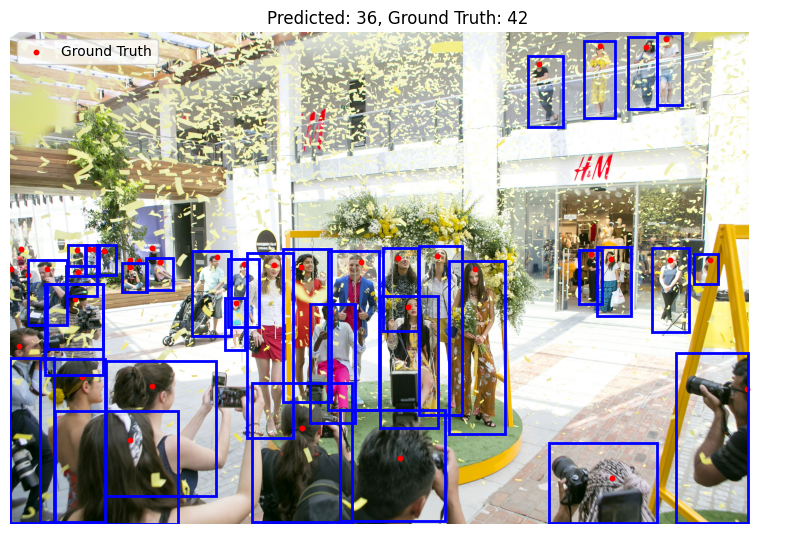

In [27]:
plot_ground_truth_and_prediction(291)

In [24]:
import os
import cv2
import scipy.io
import matplotlib.pyplot as plt
from ultralytics import YOLO

img_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img"
mat_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/mats"
model = YOLO("/home/stevenyang/Desktop/cmput469/YOLO/runs/detect/crowd_counting_v11/weights/best.pt")

def eval(index):
    img_file = f"{index:04d}.jpg" 
    img_path = os.path.join(img_dir, img_file)
    mat_file = f"{index:04d}.mat"
    mat_path = os.path.join(mat_dir, mat_file)

    if not os.path.exists(img_path):
        print(f"Image file {img_path} not found.")
        return None, None

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return None, None

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    GT_loc = mat_data['annBoxes']
    ground_truth_count = len(GT_loc)

    # if ground_truth_count > 20:
    #     return None, None

    results = model.predict(source=img_path, conf=0.5)
    predicted_count = sum(len(result.boxes) for result in results)

    return ground_truth_count, predicted_count

mae = 0
mape = 0
count = 0

for x in range(1,685):
    gt, p = eval(x)
    if gt is not None and p is not None:
        err = abs(int(gt) - int(p))
        mae += err
        mape += err / gt
        count += 1


mae = mae / count
mape = (mape / count) * 100


print(f"MAE: {mae}")
print(f"MAPE: {mape}%")



image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img/0001.jpg: 896x1280 7 pps, 49.8ms
Speed: 4.8ms preprocess, 49.8ms inference, 0.9ms postprocess per image at shape (1, 3, 896, 1280)

image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img/0002.jpg: 960x1280 28 pps, 53.9ms
Speed: 5.4ms preprocess, 53.9ms inference, 0.8ms postprocess per image at shape (1, 3, 960, 1280)

image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img/0003.jpg: 960x1280 31 pps, 53.0ms
Speed: 4.9ms preprocess, 53.0ms inference, 1.4ms postprocess per image at shape (1, 3, 960, 1280)

image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img/0004.jpg: 864x1280 28 pps, 48.8ms
Speed: 5.0ms preprocess, 48.8ms inference, 0.8ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /home/stevenyang/Desktop/cmput469/YOLO/NWPU_60/img/0005.jpg: 864x1280 23 pps, 46.4ms
Speed: 4.6ms preprocess, 46.4ms inference, 1.3ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /home/stevenyang/Des

KeyboardInterrupt: 